<a href="https://colab.research.google.com/github/gayatripatil3/Capstone_Implementation/blob/main/Contentbased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

from google.colab import files
files.upload()

Saving google_books_1299.csv to google_books_1299.csv


{'google_books_1299.csv': b'Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date\r\n0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,"NO SAFE PLACE LEFT At great cost to the Garrison and the Survey Corps, Commander Erwin has managed to recover Eren from the Titans who tried to carry him off. But during the battle, Eren manifested yet another power he doesn\'t understand. As Eren and Krista find new enemies, the Survey Corps faces threats from both inside and outside the walls. And what will happen to Ymir, now that she has decided to make herself the Titans\' prize?",Kodansha Comics,192,none,9.78E+12,English,"Jul 31, 2014"\r\n1,Antiques Roadkill: A Trash \'n\' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,"Determined to make a new start in her quaint hometown on the banks of the Mississippi, Brandy Borne never dreams she\'ll become the prime suspect in a murder case. . . \n\nMoving back in with her eccen

In [ ]:
df=pd.read_csv('google_books_1299.csv')
df.head(50)

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,"Jan 8, 2009"
5,5,"A Feast for Crows (A Song of Ice and Fire, Boo...",George R.R. Martin,4.5,832,29.29,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,864.0,none,9.78E+12,English,"Feb 24, 2011"
6,6,God of War: The Official Novelization,J.M. Barlog,4.5,94,15.82,SAR,The novelization of the highly anticipated God...,Titan Books,400.0,"Fiction , Media Tie-In",9.78E+12,English,"Aug 28, 2018"
7,7,Edgedancer: From the Stormlight Archive,Brandon Sanderson,4.8,221,36.79,SAR,From #1 New York Times bestselling author Bran...,Tor Books,226.0,"Fiction , Fantasy , Epic",9.78E+12,English,"Oct 17, 2017"
8,8,"Blood, Sweat, and Pixels: The Triumphant, Turb...",Jason Schreier,4.3,135,50.25,SAR,NATIONAL BESTSELLERDeveloping video games—hero...,HarperCollins,304.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,"Sep 5, 2017"
9,9,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Biography &amp, Autobiography , Medical (incl....",9.78E+12,English,"Oct 17, 2019"


In [ ]:
df.shape

(1299, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book_id         1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   float64
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 142.2+ KB


In [ ]:
df.isnull().sum()

Book_id            0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [ ]:
df.columns

Index(['Book_id', 'title', 'author', 'rating', 'voters', 'price', 'currency',
       'description', 'publisher', 'page_count', 'generes', 'ISBN', 'language',
       'published_date'],
      dtype='object')

In [ ]:
df.language.unique()

array(['English'], dtype=object)

In [ ]:
df.columns

Index(['Book_id', 'title', 'author', 'rating', 'voters', 'price', 'currency',
       'description', 'publisher', 'page_count', 'generes', 'ISBN', 'language',
       'published_date'],
      dtype='object')

In [ ]:
df.language.unique()

array(['English'], dtype=object)

In [ ]:
df.publisher.value_counts()

HarperCollins UK             112
Hachette UK                  112
Penguin                       75
Simon and Schuster            71
DC                            52
                            ... 
Hay House, Inc                 4
Courier Corporation            4
Kodansha America LLC           4
Archie Comic Publications      3
One Acre Press                 3
Name: publisher, Length: 82, dtype: int64

In [ ]:
df.generes.value_counts()

none                                                        527
Fiction , Thrillers , Suspense                               35
Fiction , Fantasy , Epic                                     33
Comics &amp, Graphic Novels , Superheroes                    30
Fiction , Mystery &amp, Detective , General                  21
                                                           ... 
Biography &amp, Autobiography , Science &amp, Technology      1
Political Science , Public Affairs &amp, Administration       1
Cooking , Holiday                                             1
Social Science , Popular Culture                              1
Medical , Health Care Delivery                                1
Name: generes, Length: 242, dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['Year'] = pd.to_datetime(df['published_date']).dt.to_period('Y')

KeyError: ignored

In [ ]:


df2 = df.drop_duplicates(keep=False)
df2 = df2.drop_duplicates(['title'], keep='first')
#replace NaN with an empty string
df2['description'] = df2['description'].fillna('')
#removing commas
df2['voters'] = df2['voters'].replace(',','', regex=True)
#filling with 0
df2['voters'] = df2['voters'].fillna(0)

#changing type for int
df2['voters'] = df2['voters'].astype(int)
df2.dtypes

Book_id             int64
title              object
author             object
rating            float64
voters              int64
price             float64
currency           object
description        object
publisher          object
page_count        float64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [ ]:
df2.shape

(246, 14)

In [ ]:
df2.describe()

,Book_id,rating,voters,price,page_count
count,246.000000,232.000000,246.000000,246.000000,2.460000e+02
mean,224.703252,4.429310,847.882114,46.377724,3.975610e+10
std,197.759876,0.365981,3591.803226,63.007404,6.235500e+11
min,0.000000,2.500000,0.000000,0.000000,7.000000e+00
25%,72.750000,4.200000,10.000000,19.650000,1.600000e+02
50%,169.500000,4.500000,76.000000,39.265000,2.880000e+02
75%,320.250000,4.700000,397.000000,59.030000,4.000000e+02
max,1124.000000,5.000000,38526.000000,886.080000,9.780000e+12


In [ ]:
authors = df2['author'].value_counts().head(10)
authors

Brian Tracy        6
Ian Flynn          6
Blake Pierce       6
Morgan Rice        5
Robert Jordan      5
Agatha Christie    4
Disha Experts      4
Barbara Allan      4
Geoff Johns        4
Robert Kirkman     3
Name: author, dtype: int64

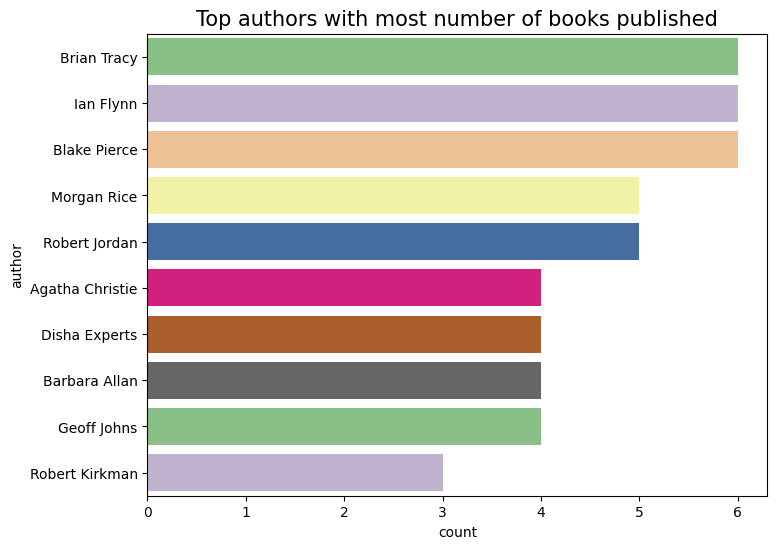

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y = "author", data = df2, order = authors.index, palette = "Accent")
plt.title('Top authors with most number of books published', fontsize = 15)
plt.show()

In [ ]:
books = df2.sort_values('voters', ascending = False).head(10).set_index('title')


In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=books['voters'], y=books.index, palette='Set2')
plt.title('The books with the largest number of voters', fontsize = 15)
plt.show()

In [ ]:
rating = df2[df2['voters']>500]

In [ ]:
books_rated = rating[['rating','title']].groupby('title').mean().sort_values('rating', axis=0, ascending = False).head(10)
books_rated

,rating
title,
Morning Star,4.8
Death Masks,4.8
Thrawn (Star Wars),4.7
The Shadow Rising: Book Four of 'The Wheel of Time',4.7
The Eye of the World: Book One of 'The Wheel of Time',4.7
"Mistborn Trilogy: The Final Empire, The Well of Ascension, The Hero of Ages",4.7
A Game of Thrones: A Song of Ice and Fire: Book One,4.6
And Then There Were None,4.6
"The Lord of the Rings: The Fellowship of the Ring, The Two Towers, The Return of the King",4.6


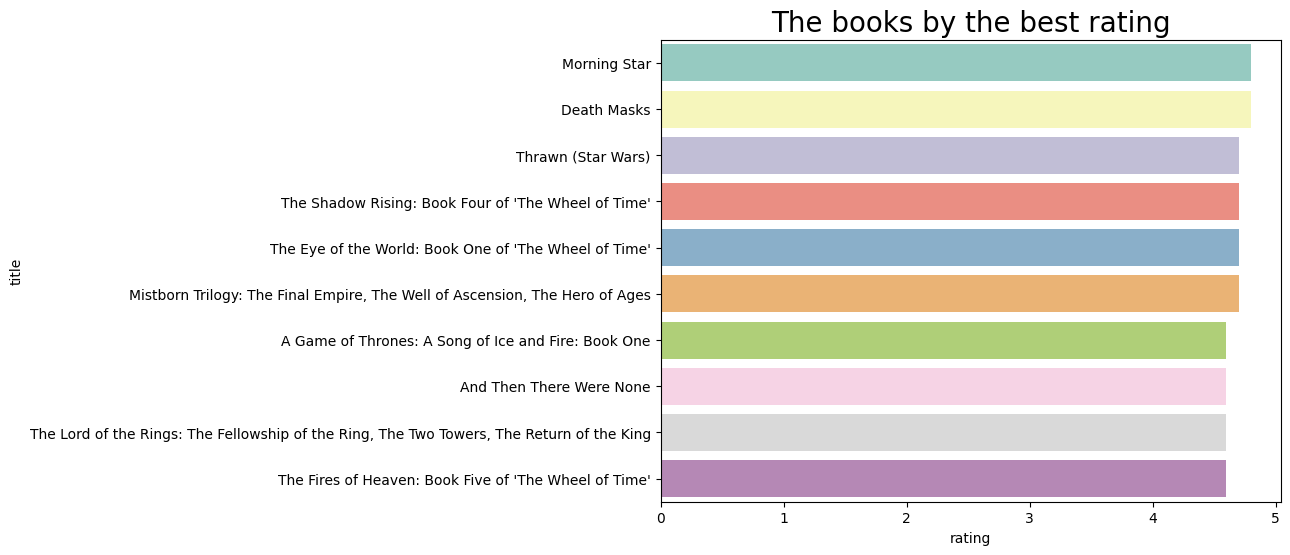

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=books_rated['rating'], y=books_rated.index, palette='Set3')
plt.title('The books by the best rating', fontsize = 20)
plt.show()

In [ ]:
publisher = df2['publisher'].value_counts().head(10)
publisher

Hachette UK             20
Marvel Entertainment    16
Penguin                 15
Simon and Schuster      15
HarperCollins UK        14
DC                      13
IDW Publishing           8
Harper Collins           7
Blake Pierce             6
Del Rey                  6
Name: publisher, dtype: int64

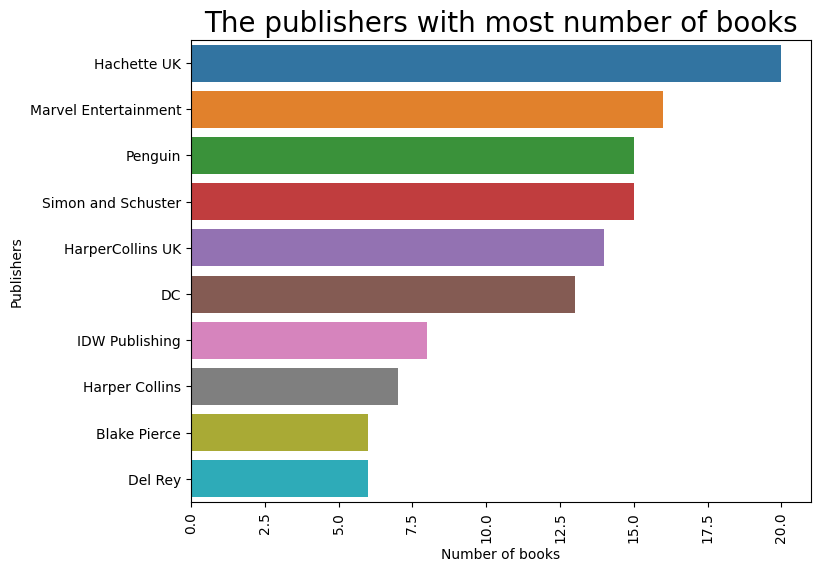

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=publisher,y=publisher.index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('Number of books')
plt.title('The publishers with most number of books', fontsize = 20)
plt.show()

In [ ]:
pub_year = df2.Year.value_counts().head(10)
pub_year

AttributeError: ignored

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=pub_year.index,y=pub_year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of published books')
plt.title('The number of published books by years')
plt.show()

In [ ]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(df2.rating, color = 'teal')
plt.xlabel('Rating', fontsize=13)
plt.title('Rating distribution for all books',fontsize=15)
plt.show();

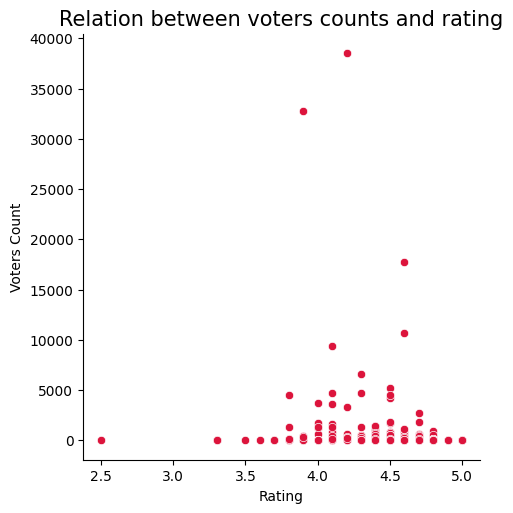

In [ ]:
ax = sns.relplot(data=df2, x="rating", y="voters", color = 'crimson', sizes=(100, 200), height=5, marker='o')
plt.title("Relation between voters counts and rating",fontsize = 15)
ax.set_axis_labels("Rating", "Voters Count");


In [ ]:
C = df2['rating'].mean()
print(C)

4.429310344827586


In [ ]:
m = df2['voters'].quantile(0.90)
print(m)

1349.5


In [ ]:
q_book = df2.copy().loc[df2['voters'] >= m]
q_book.shape

(25, 14)

In [ ]:
def weighted_rating(df, m=m, C=C):
    """Function for compute the weighted rating of each book"""
    v = df['voters']
    R = df['rating']
    weight = (v/(v+m) * R) + (m/(m+v) * C)
    return weight

In [ ]:
q_book['score'] = q_book.apply(weighted_rating, axis=1)

In [ ]:
q_book = q_book.sort_values('score', ascending=False)
#print the top 15 movies
q_book[['title', 'voters', 'rating', 'score']].head(10)

,title,voters,rating,score
285,"Mistborn Trilogy: The Final Empire, The Well o...",2700,4.7,4.609792
41,Ready Player One,17719,4.6,4.587920
214,The Eye of the World: Book One of 'The Wheel o...,1780,4.7,4.583273
69,A Game of Thrones: A Song of Ice and Fire: Boo...,10650,4.6,4.580804
56,Civil War: Volume 1,5177,4.5,4.485383
310,The Walking Dead: Compendium 1,4533,4.5,4.483783
190,It,4260,4.5,4.482994
239,A Dance with Dragons: A Song of Ice and Fire: ...,1799,4.5,4.469701
81,Batman: Year One,1756,4.5,4.469282
32,How to Win Friends and Influence People,1382,4.4,4.414481


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df2['description'])

tfidf_matrix.shape

(246, 7482)

In [ ]:
tfidf_matrix

<246x7482 sparse matrix of type '<class 'numpy.float64'>'
	with 20354 stored elements in Compressed Sparse Row format>

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

In [ ]:
cosine_sim[0]

In [ ]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices[:5]

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    """Function to create recommendations"""
    index = indices[title]
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:11]
    book_indices = [i[0] for i in sim_score]
    return df2['title'].iloc[book_indices]

In [ ]:
get_recommendations('How To Win Friends and Influence People')


In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['generes'])

count_matrix.shape

In [ ]:
#computing the Cosine Similarity matrix based on the count matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
df3 = df2.reset_index()
indices = pd.Series(df3.index, index=df3['title'])

In [ ]:
get_recommendations('The Art of Super Mario Odyssey', cosine_sim2)

In [ ]:
get_recommendations('How To Win Friends and Influence People', cosine_sim2)

In [ ]:
get_recommendations('The Secret', cosine_sim2)

In [ ]:
def get_recommendations1(rating, cosine_sim=cosine_sim):
    """Function to create recommendations"""
    index = indices[rating]
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:11]
    book_indices = [i[0] for i in sim_score]
    return df2['title'].iloc[book_indices]

In [ ]:
get_recommendations1('The Art of Super Mario Odyssey')

In [ ]:
tfidf1 = TfidfVectorizer(stop_words='english')
tfidf_matrix1 = tfidf1.fit_transform(df2['rating'])

tfidf_matrix1.shape

In [ ]:
get_recommendations('Shall We Tell the President')